In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [6]:
def plotSVC(title):
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
  plt.subplot(1, 1, 1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title(title)
  plt.show()

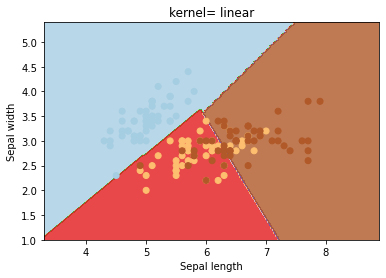

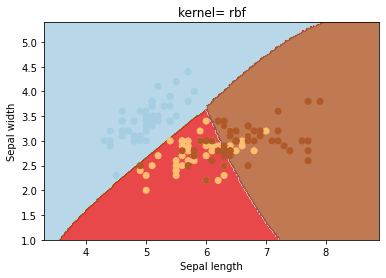

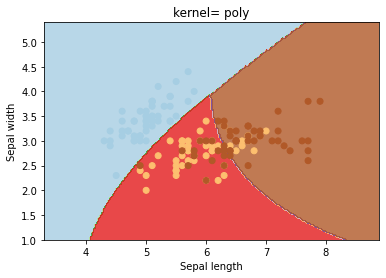

In [8]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
  svc = svm.SVC(kernel=kernel).fit(X, y)
  plotSVC('kernel= ' + str(kernel))

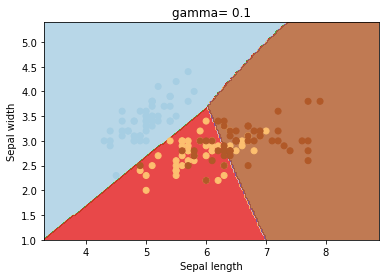

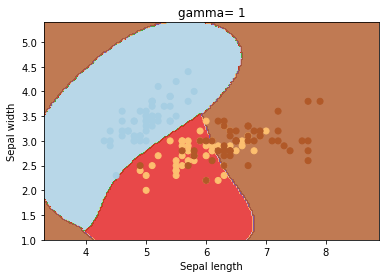

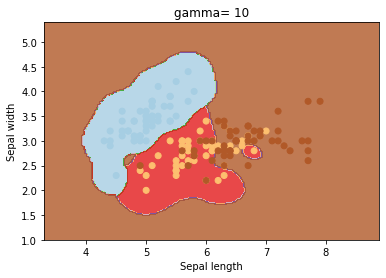

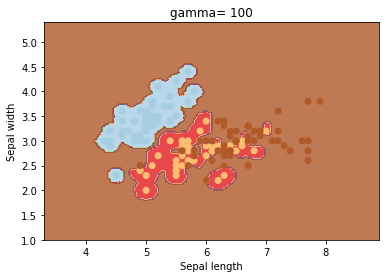

In [9]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
   svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
   plotSVC('gamma= ' + str(gamma))

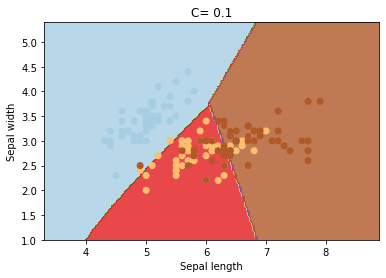

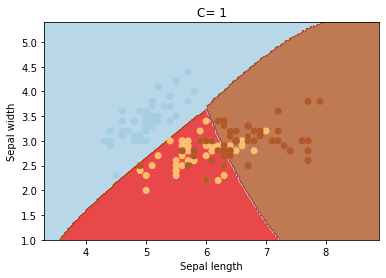

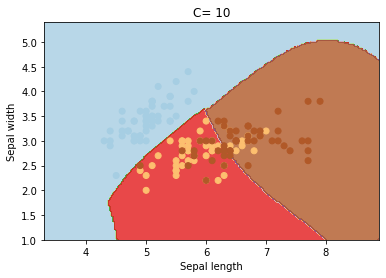

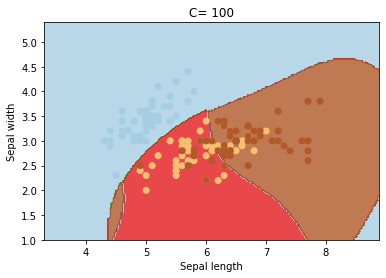

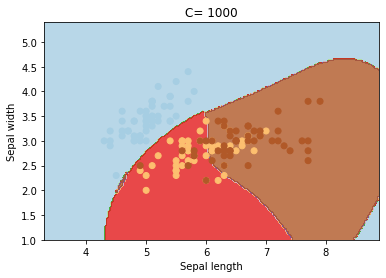

In [10]:
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
   svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
   plotSVC('C= ' + str(c))

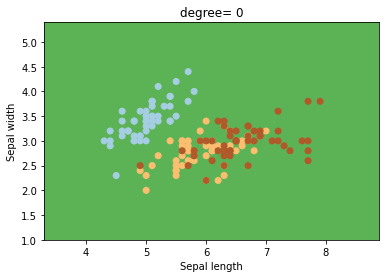

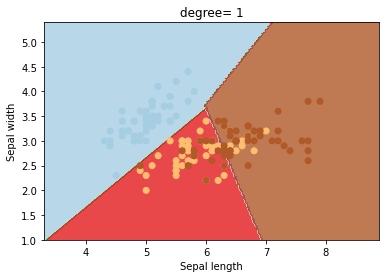

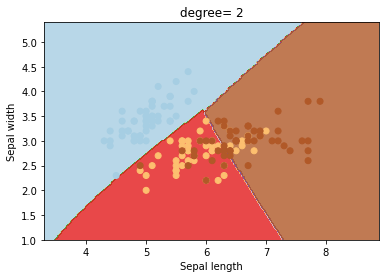

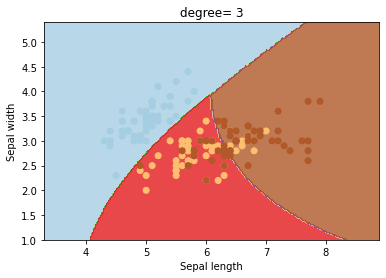

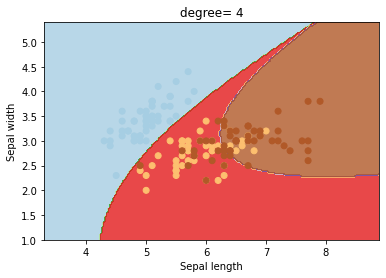

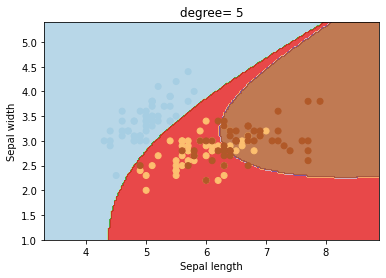

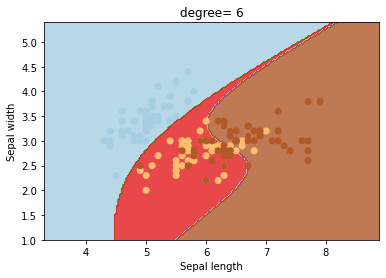

In [11]:
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
   svc = svm.SVC(kernel='poly', degree=degree).fit(X, y)
   plotSVC('degree= ' + str(degree))

In [12]:
from sklearn.model_selection import GridSearchCV 

In [26]:
def print_results(results):
    print('Best Results: {}\n'.format(results.best_params_))
    means = results.cv_params_['mean_test_score']
    stds = results.cv_params['std_test_score']
    for mean, std, param in zip(means, stds, results.cv_params['params']):
        print('{} (+/- {}) for {}'.format(round(mean, 3), round(std**2, 3), params))
        

In [ ]:
svc = svm.SVC()
parameters = {
    'kernel' : ['poly', 'rbf', 'linear'], 
    'C' : [0.1, 1, 10, 100],
    'degree' : [0, 1,2, 3, 4, 5],
    'gamma': [0.1, 1, 10, 100]
}

cv = GridSearchCV(svc, parameters, cv = 5)
cv.fit(X, y)

In [ ]:
print_results(cv)

In [25]:
cv

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [0, 1, 2, 3, 4, 5],
                         'gamma': [0.1, 1, 10, 100],
                         'kernel': ['poly', 'rbf', 'linear']})